# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

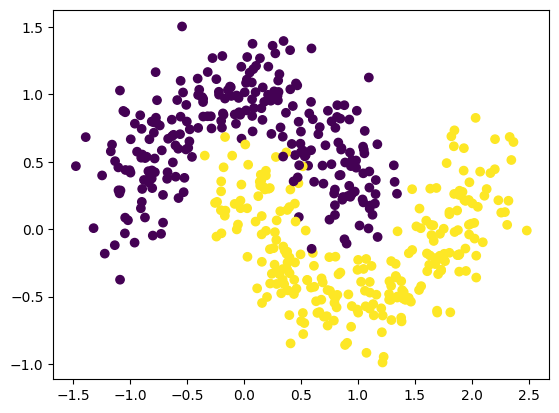

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
from sklearn.linear_model import LogisticRegression
import matplotlib.gridspec as gridspec
import itertools
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


lr = LogisticRegression(C=1.0, max_iter=1000) # Параметры логистической регрессии
svm = SVC(kernel='linear', C=1.0) # Параметры SVM с линейным ядром

### YOUR CODE HERE

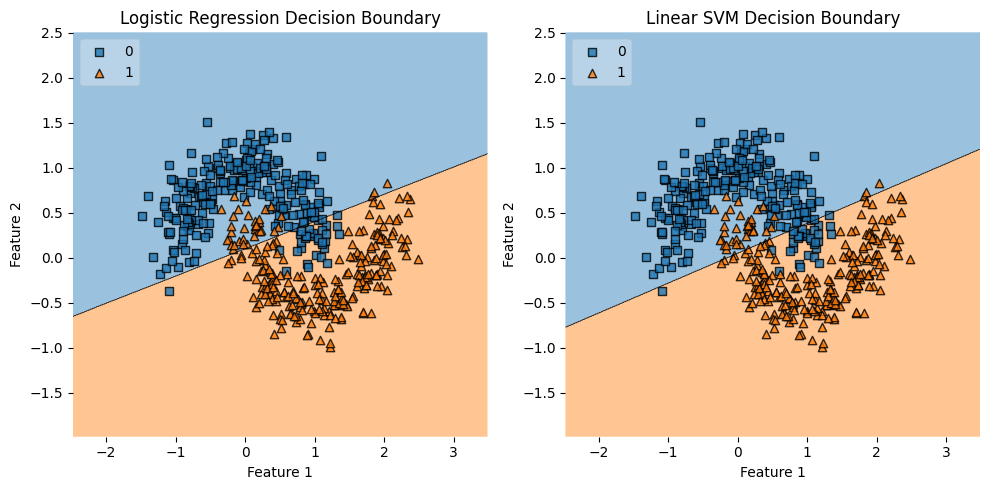

Logistic Regression Accuracy: 0.856
SVM Accuracy: 0.858


In [5]:
# Обучение и визуализация логистической регрессии
lr.fit(moons_points, moons_labels)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_decision_regions(X=moons_points, y=moons_labels, clf=lr, legend=2)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# Обучение и визуализация SVM с линейным ядром
svm.fit(moons_points, moons_labels)
plt.subplot(1, 2, 2)
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm, legend=2)
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()
# Оценка метрики классификации
lr_preds = lr.predict(moons_points)
svm_preds = svm.predict(moons_points)
print("Logistic Regression Accuracy:", accuracy_score(moons_labels, lr_preds))
print("SVM Accuracy:", accuracy_score(moons_labels, svm_preds))

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Polynomial Kernel (degree=3) Accuracy: 0.896
Polynomial Kernel (degree=5) Accuracy: 0.886
Polynomial Kernel (degree=7) Accuracy: 0.886
Polynomial Kernel (degree=9) Accuracy: 0.9
RBF Kernel Accuracy: 0.974
Sigmoid Kernel Accuracy: 0.648


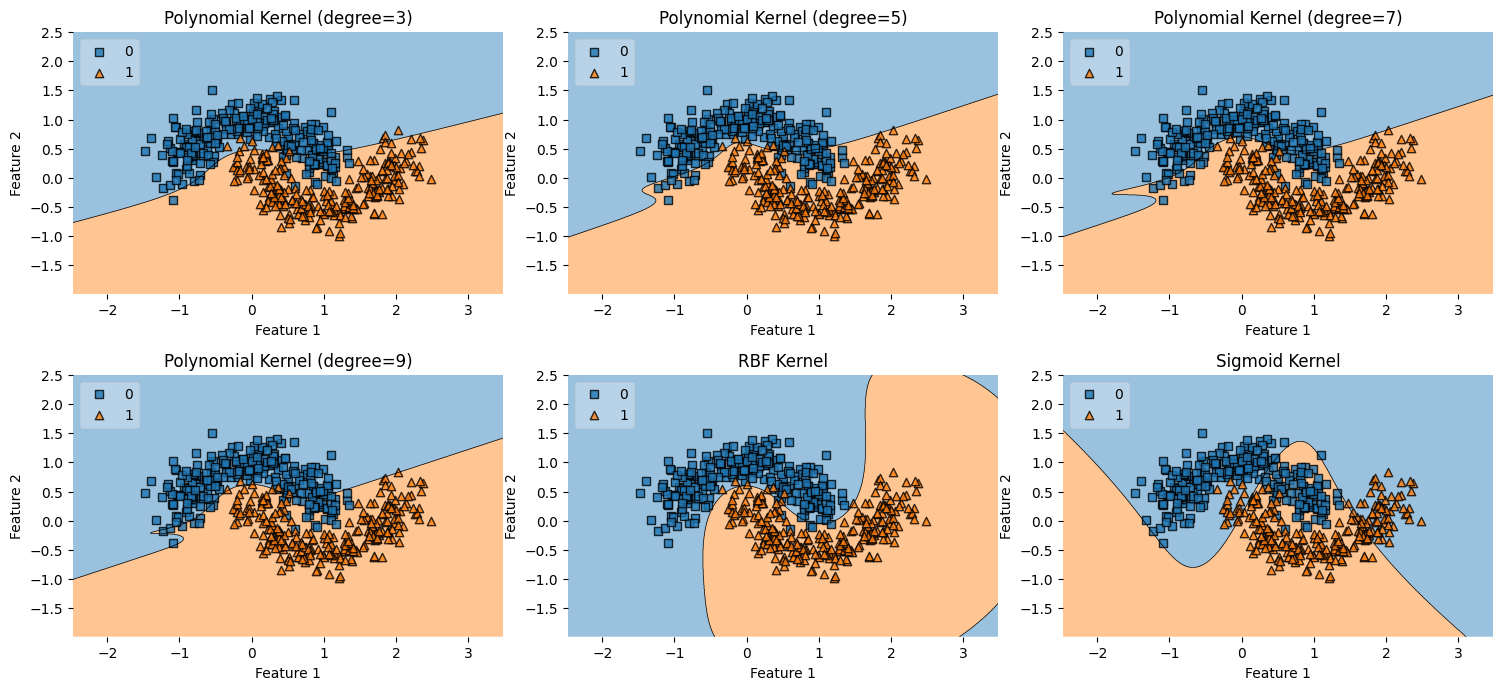

In [7]:
### YOUR CODE HERE
# Оптимизация и визуализация SVM с различными ядрами

degrees = [3, 5, 7, 9]  # Разные степени для полиномиального ядра

plt.figure(figsize=(15, 10))

# Полиномиальное ядро с разными степенями
for i, degree in enumerate(degrees):
    svm_poly = SVC(kernel='poly', degree=degree, gamma='scale', C=10)
    svm_poly.fit(moons_points, moons_labels)

    plt.subplot(3, 3, i + 1)
    plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_poly, legend=2)
    plt.title(f"Polynomial Kernel (degree={degree})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    print(f"Polynomial Kernel (degree={degree}) Accuracy:", accuracy_score(moons_labels, svm_poly.predict(moons_points)))

# RBF ядро
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(moons_points, moons_labels)
plt.subplot(3, 3, 5)
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_rbf, legend=2)
plt.title("RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
print("RBF Kernel Accuracy:", accuracy_score(moons_labels, svm_rbf.predict(moons_points)))

# Сигмоидное ядро
svm_sigmoid = SVC(kernel='sigmoid', gamma='scale', C=1.0)
svm_sigmoid.fit(moons_points, moons_labels)
plt.subplot(3, 3, 6)
plot_decision_regions(X=moons_points, y=moons_labels, clf=svm_sigmoid, legend=2)
plt.title("Sigmoid Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
print("Sigmoid Kernel Accuracy:", accuracy_score(moons_labels, svm_sigmoid.predict(moons_points)))

plt.tight_layout()
plt.show()

Что произошло с качеством классификации?
Кчество классификации для полиномиального ядра остаётся примерно на одном уровне с незначительными изменениями в точности. RBF показало наилучший результат, что свидетельствует о его способности лучше разделять нелинейные данные. Сигмоидное ядро показало самую низкую точность, что говорит о том, что оно не подходит для данного набора данных.

Как изменилась граница решений для каждого ядра?
Граница решений стала более гибкой и адаптировалась к форме данных. При увеличении степени полинома граница решений становится более сложной, но существенных изменений в классификации не наблюдается, особенно начиная с degree=5. Граница решений для RBF ядра демонстрирует гладкую и гибкую форму, что позволяет эффективно разделять данные с нелинейными зависимостями. Сигмоидное ядро создало более размытые и запутанные границы решений, что привело к низкой точности классификации.

Какую степень degree вы выбрали и почему?
Я выбрал 3, так как эта степень дала достаточно высокую точность, а увеличение степени не дало значительного улучшения результатов. Более низкая степень также приводит к менее сложной модели, что предпочтительнее для предотвращения переобучения

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Logistic Regression Accuracy (degree=3): 0.974
Logistic Regression Accuracy (degree=5): 0.984
Logistic Regression Accuracy (degree=7): 0.986


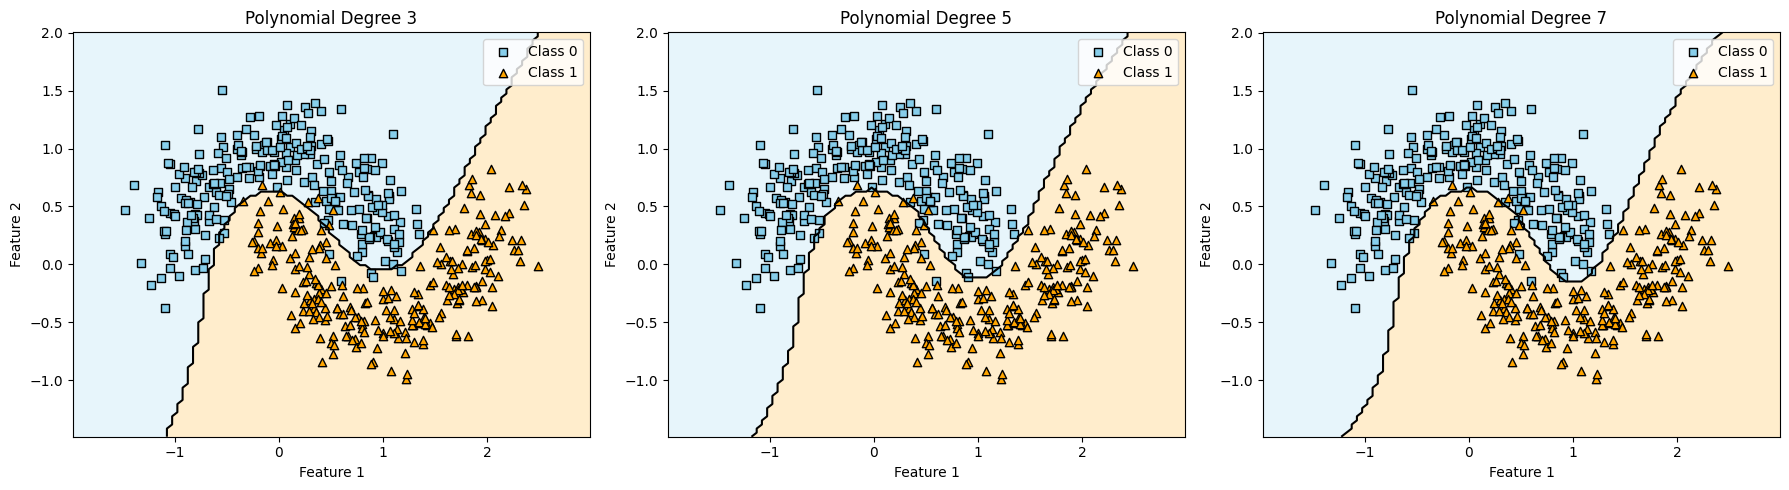

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Функция для визуализации решения (источник https://www.geeksforgeeks.org/logistic-regression-with-polynomial-features/)

def plot_decisions_custom(X, y, model, poly_features, title, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Прогноз модели на сетке
    Z = model.predict(poly_features.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    # область решений
    ax.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], colors=['skyblue', 'orange'])

    # разделительная  линия
    ax.contour(xx, yy, Z, colors='k', levels=[0], linewidths=1.5)

    # Точки
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='skyblue', edgecolor='k', marker='s', label='Class 0')  # Голубые квадраты
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='orange', edgecolor='k', marker='^', label='Class 1')  # Оранжевые треугольники

    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()


degrees = [3, 5, 7]

X = moons_points
y = moons_labels

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)  # Преобразуем признаки
    lr = LogisticRegression(C=5, solver='liblinear')  # Логистическая регрессия
    lr.fit(X_poly, y)  # Обучение

    # Визуализация
    plot_decisions_custom(X, y, lr, poly, f"Polynomial Degree {degree}", axes[i])

    # Оценка точности
    lr_acc = accuracy_score(y, lr.predict(X_poly))
    print(f"Logistic Regression Accuracy (degree={degree}): {lr_acc:.3f}")

plt.tight_layout()
plt.show()


Использование полиномиальных признаков для логистической регрессии показало более высокую точность и более четкие границы решений в сравнении с SVM с полиномиальными ядрами.
Логистическая регрессия с полиномиальными признаками даёт точность, близкую к SVM с RBF-ядром, но при этом она более понятна в интерпретации и позволяет гибко управлять сложностью модели через степень полинома. Я бы выбрал степень полинома 5, поскольку дальнейшее увеличение практически не увеличивает точность решения.


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

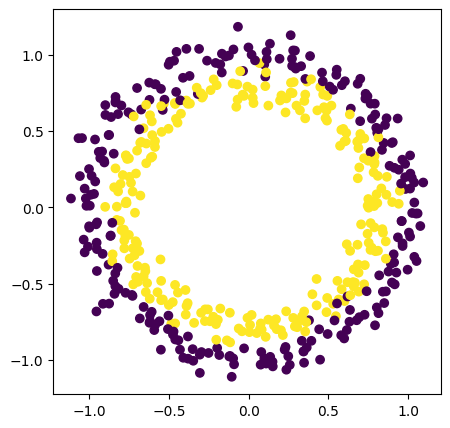

In [33]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

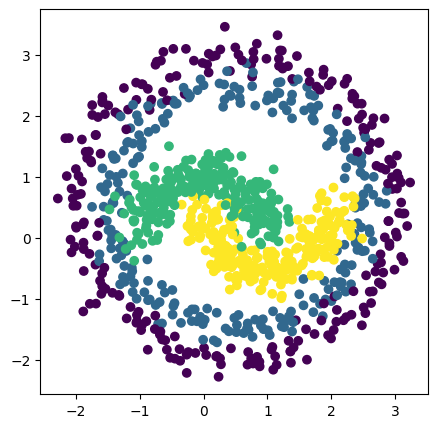

In [34]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [30]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


Logistic Regression Accuracy (degree=3): 0.853
Logistic Regression Accuracy (degree=5): 0.945
SVM RBF Kernel Accuracy: 0.921
CatBoost Accuracy: 1.000


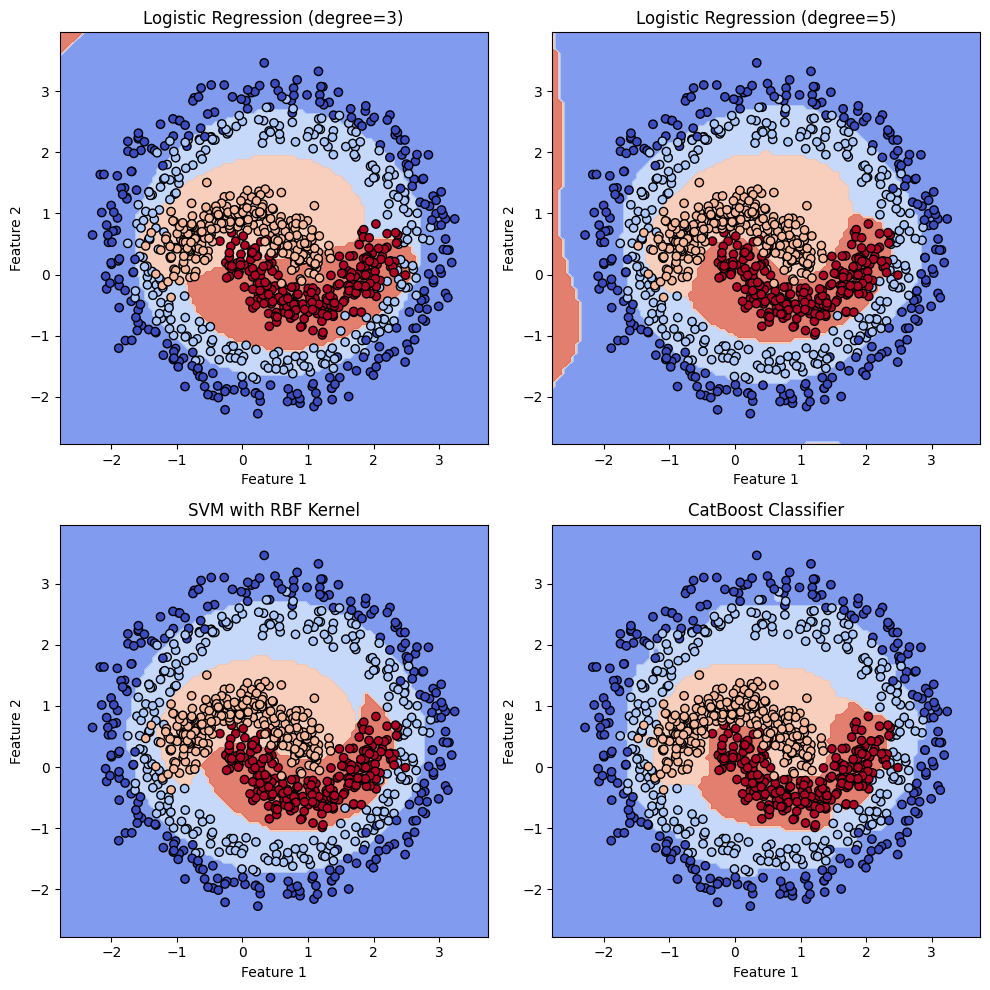

In [41]:
from catboost import CatBoostClassifier

# Функция для визуализации решений
def plot_decisions_custom_mult(X, y, model, poly_features, title, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(poly_features.transform(np.c_[xx.ravel(), yy.ravel()])) if poly_features else model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Отображаем области решений
    ax.contourf(xx, yy, Z, alpha=0.8, levels=np.arange(-0.5, 4, 1), cmap=plt.cm.coolwarm)

    # Отображаем точки
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# 1. Логистическая регрессия с полиномиальными признаками, SVM с RBF-ядром и CatBoost

degrees = [3, 5]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Создаем сетку 2x2 для 4 диаграмм

# Логистическая регрессия с полиномиальными признаками (степень 3 и 5)
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(points)  # Преобразование признаков
    lr = LogisticRegression(C=5, solver='liblinear', max_iter=1000)
    lr.fit(X_poly, labels)  # Обучение модели

    # Визуализация
    plot_decisions_custom_mult(points, labels, lr, poly, f"Logistic Regression (degree={degree})", axes[i // 2, i % 2])
    # Оценка точности
    lr_acc = accuracy_score(labels, lr.predict(X_poly))
    print(f"Logistic Regression Accuracy (degree={degree}): {lr_acc:.3f}")

# SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(points, labels)

# Визуализация для SVM
plot_decisions_custom_mult(points, labels, svm_rbf, None, "SVM with RBF Kernel", axes[1, 0])
plt.title("SVM с RBF ядром")

# Оценка точности SVM
svm_rbf_acc = accuracy_score(labels, svm_rbf.predict(points))
print(f"SVM RBF Kernel Accuracy: {svm_rbf_acc:.3f}")

# CatBoost
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=10, verbose=0)
catboost_model.fit(points, labels)

# Прогнозирование и оценка точности CatBoost
catboost_preds = catboost_model.predict(points)
catboost_acc = accuracy_score(labels, catboost_preds)
print(f"CatBoost Accuracy: {catboost_acc:.3f}")

# Визуализация решений CatBoost
plot_decisions_custom_mult(points, labels, catboost_model, None, "CatBoost Classifier", axes[1, 1])

plt.tight_layout()
plt.show()

Логистическая регрессия с полиномиальными признаками становится более эффективной при увеличении степени полинома, но при этом она уступает по точности другим моделям.
SVM с RBF ядром справляется хорошо, наилучшие результаты у CatBoost.






